In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
click = pd.read_excel('MARQ1_clickratio_from20200728.xlsx')

In [4]:
click.drop_duplicates(subset='SerialNumber', keep='last')

,tDateTime,SerialNumber,ProductName,Result,Button1_ClickRatio,Button2_ClickRatio,Button3_ClickRatio,Button4_ClickRatio,Button5_ClickRatio
0,2020-07-28 06:38:24,3340716057,"Garmin MARQ, Adventurer, GPS Watch, EMEA",1,0.267,0.234,0.246,0.231,0.267
1,2020-07-28 06:39:04,3340716049,"Garmin MARQ, Adventurer, GPS Watch, EMEA",1,0.250,0.259,0.250,0.238,0.246
2,2020-07-28 06:39:52,3340716046,"Garmin MARQ, Adventurer, GPS Watch, EMEA",1,0.259,0.254,0.262,0.246,0.230
3,2020-07-28 06:40:31,3340716052,"Garmin MARQ, Adventurer, GPS Watch, EMEA",1,0.233,0.237,0.254,0.250,0.276
4,2020-07-28 06:41:10,3340716055,"Garmin MARQ, Adventurer, GPS Watch, EMEA",1,0.254,0.259,0.230,0.267,0.259
...,...,...,...,...,...,...,...,...,...
40053,2022-10-15 06:26:16,3433524494,"Garmin MARQ, Aviator, GPS Watch,Americas",1,0.231,0.250,0.266,0.266,0.254
40054,2022-10-15 06:26:58,3433524495,"Garmin MARQ, Aviator, GPS Watch,Americas",1,0.224,0.262,0.262,0.262,0.246
40055,2022-10-15 06:27:40,3433524500,"Garmin MARQ, Aviator, GPS Watch,Americas",1,0.254,0.269,0.274,0.281,0.258
40056,2022-10-15 06:28:14,3433524501,"Garmin MARQ, Aviator, GPS Watch,Americas",1,0.274,0.281,0.262,0.279,0.270


<AxesSubplot:>

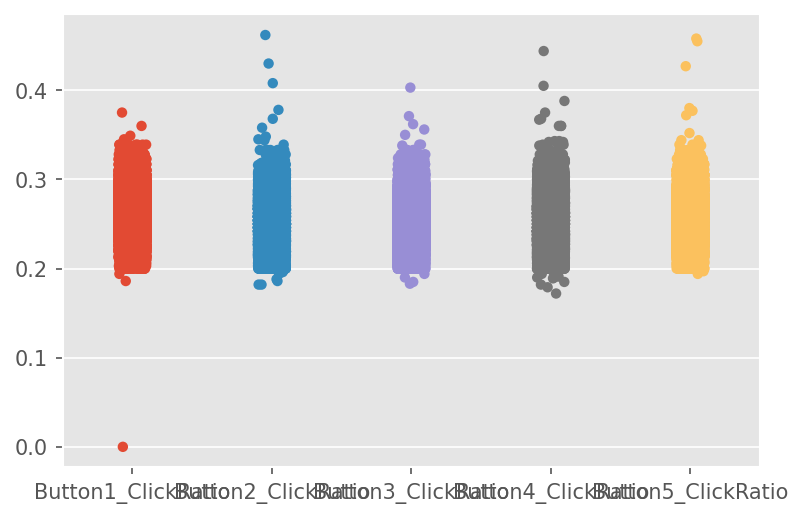

In [5]:
plt.figure(dpi=150)
sns.stripplot(data=click.iloc[:,4:])

In [6]:
click_melt = click.melt(id_vars=['tDateTime', 'SerialNumber', 'ProductName', 'Result'],
value_vars=['Button1_ClickRatio','Button2_ClickRatio','Button3_ClickRatio','Button4_ClickRatio','Button5_ClickRatio'])
click_melt.head()

,tDateTime,SerialNumber,ProductName,Result,variable,value
0,2020-07-28 06:38:24,3340716057,"Garmin MARQ, Adventurer, GPS Watch, EMEA",1,Button1_ClickRatio,0.267
1,2020-07-28 06:39:04,3340716049,"Garmin MARQ, Adventurer, GPS Watch, EMEA",1,Button1_ClickRatio,0.250
2,2020-07-28 06:39:52,3340716046,"Garmin MARQ, Adventurer, GPS Watch, EMEA",1,Button1_ClickRatio,0.259
3,2020-07-28 06:40:31,3340716052,"Garmin MARQ, Adventurer, GPS Watch, EMEA",1,Button1_ClickRatio,0.233
4,2020-07-28 06:41:10,3340716055,"Garmin MARQ, Adventurer, GPS Watch, EMEA",1,Button1_ClickRatio,0.254


(0.15, 0.49350000000000005)

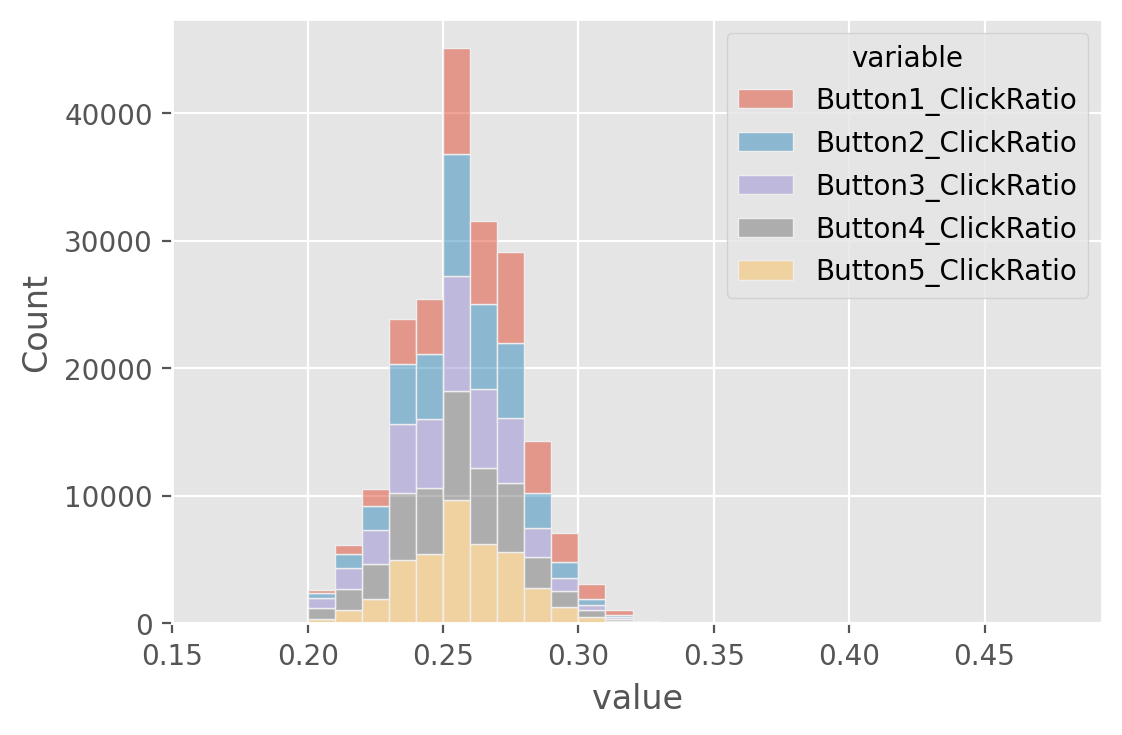

In [7]:
plt.figure(dpi=200)
sns.histplot(data=click_melt,x='value',hue='variable', binwidth=0.01,multiple="stack", alpha=0.5)
plt.xlim(0.15)

In [8]:
click.describe().transpose()[['count','mean','std','max']]

,count,mean,std,max
SerialNumber,40058.0,3.379740e+09,5.411148e+07,3.999505e+09
Result,40058.0,1.000000e+00,0.000000e+00,1.000000e+00
Button1_ClickRatio,40058.0,2.620973e-01,2.120962e-02,3.750000e-01
Button2_ClickRatio,40058.0,2.564446e-01,2.021576e-02,4.620000e-01
Button3_ClickRatio,40058.0,2.532149e-01,2.088805e-02,4.030000e-01
Button4_ClickRatio,40058.0,2.538850e-01,2.182758e-02,4.440000e-01
Button5_ClickRatio,40058.0,2.562531e-01,2.028142e-02,4.580000e-01


In [9]:
click.iloc[click.Button1_ClickRatio.idxmax()]

tDateTime                                  2020-08-06 10:22:19
SerialNumber                                        3339249103
ProductName           MARQ,Commander, GPS Smart Wearable Devic
Result                                                       1
Button1_ClickRatio                                       0.375
Button2_ClickRatio                                       0.234
Button3_ClickRatio                                       0.265
Button4_ClickRatio                                       0.297
Button5_ClickRatio                                       0.273
Name: 1166, dtype: object